# 02 "Haabersti hõberemmelgas" kogumine Delfi veebilehelt

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud
from estnltk import Text
import re

Delfi veebilehtelt koguti veebiämblikuga uudisartiklite lingid. Kogutud lingid on failis:  delfiscraper/delfiscraper/spiders/delfi_lingi_hoberemmelgas.csv
Linkide kogumiseks kasutatud valikukriteeriumid:
https://old.delfi.ee/archive/?tod=31.12.2021&fromd=01.01.2017&channel=0&category=0&query=Haabersti+h%C3%B5beremmelga,
https://old.delfi.ee/archive/?tod=31.12.2021&fromd=01.01.2017&channel=0&category=0&query=Haabersti+h%C3%B5beremmelgas,
https://www.delfi.ee/otsing?search=Haabersti%20remmelga&domain=all&categoriesExternalId&order=LATEST&publishTimeFrom=2017-01-01T00%3A00%3A00Z&publishTimeTo=2021-12-31T21%3A59%3A59Z,
https://www.delfi.ee/otsing?search=Haabersti%20remmelgas&domain=all&categoriesExternalId&order=LATEST&publishTimeFrom=2017-01-01T00%3A00%3A00Z&publishTimeTo=2021-12-31T21%3A59%3A59Z

1) periood: 01.01.2017 – 31.12.2021

2) kanal: kõik

3) kategooria: kõik

In [279]:
# Delfi veebilehelt veebiämblikuga kogutud lingid loetakse listi

# list Delfi linkide jaoks
urls_delfi_toor = []

with open('delfiscraper/delfiscraper/spiders/delfi_Haabersti_hoberemmelgas_01012017_31122021.csv', 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for line in reader:
        if line != []:
            urls_delfi_toor.append(line[0])
# linkide failis esimene rida ei ole uudise link
print(len(urls_delfi_toor)-1)

144


In [280]:
# võimalike topeltlinkide eemaldamine
urls_delfi = list(dict.fromkeys(urls_delfi_toor))
print("Delfi veebilehtedelt kogutud linkide arv: ", len(urls_delfi)-1)

Delfi veebilehtedelt kogutud linkide arv:  94


Delfi veebilehtedelt kogutud linkidelt saadakse BeautifulSoup abil järgmine info:

1) väljaande nimi

2) artikli pealkiri

3) artikli tekst

4) artikli publitseerimise kuupäev

In [281]:
headers = requests.utils.default_headers()
headers.update(
  { 'User-Agent': 'my crawler (anneliis@ut.ee) / on studying purpose', }
)

pealkirjad = []
tekstid = []
väljaanded = []
ajad =[]

for url in tqdm(urls_delfi[1:]):
  
    try:
        yhendatud_tekst = []
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        väljaanne = soup.find("meta", {"property" :"og:site_name"})['content']
        print(väljaanne)

        pealkiri = soup.find("meta", {"property" :"og:title"})['content']
        
        #artik = "article__body"
        artik = "G-col-article"
        publits = {"name": "cXenseParse:recs:publishtime"}
        #publits = {"property" : "article:published_time"}
                    
        tekst = soup.findAll("div",{"class" : artik})

        for t in tekst:
            p = t.find_all('p')
            for r in p:
                yhendatud_tekst.append(r.text)
          
        tekstid.append(yhendatud_tekst)

        aeg = soup.find("meta", publits)['content']
        
    except Exception as e:
        print("Exception is :", e, url)
        
    pealkirjad.append(pealkiri)
    väljaanded.append(väljaanne)
    ajad.append(aeg)
    artikkel = [' '.join(article) for article in tekstid]

  1%|▉                                                                                  | 1/94 [00:01<01:50,  1.19s/it]

Eesti Ekspress


  2%|█▊                                                                                 | 2/94 [00:01<01:29,  1.03it/s]

Delfi


  3%|██▋                                                                                | 3/94 [00:02<01:11,  1.27it/s]

Ärileht


  4%|███▌                                                                               | 4/94 [00:02<00:58,  1.53it/s]

Eesti Päevaleht


  5%|████▍                                                                              | 5/94 [00:02<00:48,  1.82it/s]

Ärileht


  6%|█████▎                                                                             | 6/94 [00:04<01:11,  1.23it/s]

Maaleht


  7%|██████▏                                                                            | 7/94 [00:04<00:58,  1.49it/s]

Maaleht


  9%|███████                                                                            | 8/94 [00:04<00:49,  1.72it/s]

Kroonika


 10%|███████▉                                                                           | 9/94 [00:05<00:43,  1.93it/s]

Delfi TV


 11%|████████▋                                                                         | 10/94 [00:05<00:42,  1.97it/s]

Delfi


 12%|█████████▌                                                                        | 11/94 [00:06<00:38,  2.17it/s]

Eesti Päevaleht


 13%|██████████▍                                                                       | 12/94 [00:06<00:46,  1.76it/s]

Delfi


 14%|███████████▎                                                                      | 13/94 [00:07<00:49,  1.64it/s]

Delfi


 15%|████████████▏                                                                     | 14/94 [00:08<00:46,  1.73it/s]

Eesti Päevaleht


 16%|█████████████                                                                     | 15/94 [00:08<00:38,  2.03it/s]

Kroonika


 17%|█████████████▉                                                                    | 16/94 [00:08<00:36,  2.11it/s]

Delfi


 18%|██████████████▊                                                                   | 17/94 [00:10<00:57,  1.33it/s]

Kroonika


 19%|███████████████▋                                                                  | 18/94 [00:10<00:49,  1.53it/s]

Eesti Päevaleht


 20%|████████████████▌                                                                 | 19/94 [00:12<01:11,  1.05it/s]

Kroonika


 21%|█████████████████▍                                                                | 20/94 [00:12<00:56,  1.31it/s]

Eesti Päevaleht


 22%|██████████████████▎                                                               | 21/94 [00:12<00:45,  1.59it/s]

Eesti Päevaleht


 23%|███████████████████▏                                                              | 22/94 [00:14<01:04,  1.11it/s]

Eesti Ekspress


 24%|████████████████████                                                              | 23/94 [00:14<00:52,  1.34it/s]

Eesti Ekspress


 26%|████████████████████▉                                                             | 24/94 [00:15<00:42,  1.63it/s]

Eesti Päevaleht


 27%|█████████████████████▊                                                            | 25/94 [00:15<00:39,  1.74it/s]

Delfi


 28%|██████████████████████▋                                                           | 26/94 [00:15<00:34,  1.98it/s]

Maaleht


 29%|███████████████████████▌                                                          | 27/94 [00:16<00:29,  2.25it/s]

Eesti Päevaleht


 30%|████████████████████████▍                                                         | 28/94 [00:16<00:30,  2.19it/s]

Delfi


 31%|█████████████████████████▎                                                        | 29/94 [00:17<00:27,  2.36it/s]

Maaleht


 32%|██████████████████████████▏                                                       | 30/94 [00:17<00:24,  2.59it/s]

Eesti Päevaleht


 33%|███████████████████████████                                                       | 31/94 [00:18<00:36,  1.75it/s]

Maaleht


 34%|███████████████████████████▉                                                      | 32/94 [00:18<00:34,  1.80it/s]

Delfi


 35%|████████████████████████████▊                                                     | 33/94 [00:19<00:31,  1.92it/s]

Delfi


 36%|█████████████████████████████▋                                                    | 34/94 [00:19<00:31,  1.93it/s]

Delfi


 37%|██████████████████████████████▌                                                   | 35/94 [00:20<00:29,  1.97it/s]

Delfi


 38%|███████████████████████████████▍                                                  | 36/94 [00:20<00:25,  2.25it/s]

Eesti Päevaleht


 39%|████████████████████████████████▎                                                 | 37/94 [00:21<00:26,  2.15it/s]

Delfi


 40%|█████████████████████████████████▏                                                | 38/94 [00:21<00:26,  2.09it/s]

Delfi


 41%|██████████████████████████████████                                                | 39/94 [00:21<00:23,  2.32it/s]

Eesti Päevaleht


 43%|██████████████████████████████████▉                                               | 40/94 [00:22<00:21,  2.46it/s]

Forte


 44%|███████████████████████████████████▊                                              | 41/94 [00:22<00:22,  2.34it/s]

Delfi


 45%|████████████████████████████████████▋                                             | 42/94 [00:23<00:20,  2.50it/s]

Delfi TV


 46%|█████████████████████████████████████▌                                            | 43/94 [00:23<00:21,  2.37it/s]

Delfi


 47%|██████████████████████████████████████▍                                           | 44/94 [00:23<00:19,  2.54it/s]

Maaleht


 48%|███████████████████████████████████████▎                                          | 45/94 [00:24<00:18,  2.68it/s]

Eesti Päevaleht


 49%|████████████████████████████████████████▏                                         | 46/94 [00:24<00:19,  2.43it/s]

Delfi


 50%|█████████████████████████████████████████                                         | 47/94 [00:25<00:20,  2.29it/s]

Delfi


 51%|█████████████████████████████████████████▊                                        | 48/94 [00:25<00:18,  2.51it/s]

Maaleht


 52%|██████████████████████████████████████████▋                                       | 49/94 [00:25<00:17,  2.63it/s]

Eesti Päevaleht


 53%|███████████████████████████████████████████▌                                      | 50/94 [00:26<00:18,  2.39it/s]

Delfi


 54%|████████████████████████████████████████████▍                                     | 51/94 [00:26<00:18,  2.28it/s]

Delfi


 55%|█████████████████████████████████████████████▎                                    | 52/94 [00:27<00:17,  2.45it/s]

Maaleht


 56%|██████████████████████████████████████████████▏                                   | 53/94 [00:27<00:15,  2.72it/s]

Maaleht


 57%|███████████████████████████████████████████████                                   | 54/94 [00:27<00:14,  2.84it/s]

Eesti Päevaleht


 59%|███████████████████████████████████████████████▉                                  | 55/94 [00:28<00:15,  2.53it/s]

Delfi


 60%|████████████████████████████████████████████████▊                                 | 56/94 [00:28<00:15,  2.39it/s]

Delfi


 61%|█████████████████████████████████████████████████▋                                | 57/94 [00:29<00:14,  2.59it/s]

Eesti Päevaleht


 62%|██████████████████████████████████████████████████▌                               | 58/94 [00:30<00:20,  1.75it/s]

Maaleht


 63%|███████████████████████████████████████████████████▍                              | 59/94 [00:30<00:19,  1.82it/s]

Delfi


 64%|████████████████████████████████████████████████████▎                             | 60/94 [00:31<00:18,  1.87it/s]

Delfi


 65%|█████████████████████████████████████████████████████▏                            | 61/94 [00:31<00:18,  1.81it/s]

Delfi


 66%|██████████████████████████████████████████████████████                            | 62/94 [00:32<00:17,  1.83it/s]

Delfi


 67%|██████████████████████████████████████████████████████▉                           | 63/94 [00:32<00:15,  2.05it/s]

Delfi TV


 68%|███████████████████████████████████████████████████████▊                          | 64/94 [00:33<00:22,  1.34it/s]

Eesti Ekspress


 69%|████████████████████████████████████████████████████████▋                         | 65/94 [00:34<00:19,  1.50it/s]

Delfi


 70%|█████████████████████████████████████████████████████████▌                        | 66/94 [00:34<00:16,  1.66it/s]

Eesti Ekspress


 71%|██████████████████████████████████████████████████████████▍                       | 67/94 [00:35<00:15,  1.75it/s]

Delfi


 72%|███████████████████████████████████████████████████████████▎                      | 68/94 [00:35<00:13,  1.93it/s]

Ärileht


 73%|████████████████████████████████████████████████████████████▏                     | 69/94 [00:36<00:12,  1.97it/s]

Delfi


 74%|█████████████████████████████████████████████████████████████                     | 70/94 [00:36<00:12,  1.97it/s]

Delfi


 76%|█████████████████████████████████████████████████████████████▉                    | 71/94 [00:37<00:10,  2.21it/s]

Eesti Päevaleht


 77%|██████████████████████████████████████████████████████████████▊                   | 72/94 [00:37<00:09,  2.43it/s]

Forte


 78%|███████████████████████████████████████████████████████████████▋                  | 73/94 [00:37<00:09,  2.31it/s]

Delfi


 79%|████████████████████████████████████████████████████████████████▌                 | 74/94 [00:38<00:07,  2.55it/s]

Eesti Päevaleht


 80%|█████████████████████████████████████████████████████████████████▍                | 75/94 [00:38<00:08,  2.35it/s]

Delfi


 81%|██████████████████████████████████████████████████████████████████▎               | 76/94 [00:39<00:08,  2.21it/s]

Delfi


 82%|███████████████████████████████████████████████████████████████████▏              | 77/94 [00:39<00:07,  2.15it/s]

Delfi


 83%|████████████████████████████████████████████████████████████████████              | 78/94 [00:40<00:07,  2.10it/s]

Delfi


 84%|████████████████████████████████████████████████████████████████████▉             | 79/94 [00:40<00:07,  2.09it/s]

Delfi


 85%|█████████████████████████████████████████████████████████████████████▊            | 80/94 [00:41<00:06,  2.06it/s]

Delfi


 86%|██████████████████████████████████████████████████████████████████████▋           | 81/94 [00:41<00:05,  2.38it/s]

Delfi TV


 87%|███████████████████████████████████████████████████████████████████████▌          | 82/94 [00:41<00:05,  2.27it/s]

Delfi


 88%|████████████████████████████████████████████████████████████████████████▍         | 83/94 [00:42<00:05,  2.14it/s]

Delfi


 89%|█████████████████████████████████████████████████████████████████████████▎        | 84/94 [00:42<00:04,  2.39it/s]

Eesti Päevaleht


 90%|██████████████████████████████████████████████████████████████████████████▏       | 85/94 [00:43<00:03,  2.26it/s]

Delfi


 91%|███████████████████████████████████████████████████████████████████████████       | 86/94 [00:43<00:03,  2.20it/s]

Delfi


 93%|███████████████████████████████████████████████████████████████████████████▉      | 87/94 [00:44<00:03,  2.23it/s]

Delfi


 94%|████████████████████████████████████████████████████████████████████████████▊     | 88/94 [00:44<00:02,  2.15it/s]

Delfi


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 89/94 [00:44<00:02,  2.40it/s]

Eesti Päevaleht


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 90/94 [00:45<00:01,  2.55it/s]

Eesti Päevaleht


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 91/94 [00:45<00:01,  2.73it/s]

Eesti Päevaleht


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 92/94 [00:46<00:00,  2.45it/s]

Delfi


 99%|█████████████████████████████████████████████████████████████████████████████████▏| 93/94 [00:46<00:00,  2.30it/s]

Delfi


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:47<00:00,  1.99it/s]

Delfi


Kogutud info uudisartiklite kohta koondatakse sõnastikuks.

In [282]:
artiklid = {'title': pealkirjad, 'text': artikkel,'subject': väljaanded, 'date': ajad, 'link': urls_delfi[1:]}

Kogutud sõnastik esitatakse tabeli kujul. Tabelis on viis veergu:

1) artikli pealkiri

2) artikli tekst

3) artikli väljaandja

4) artikli publitseerimise kuupäev

5) artikli link

In [283]:
data_delfi = pd.DataFrame(artiklid, columns = ['title', 'text','subject', 'date', 'link'])

In [284]:
data_delfi.shape

(94, 5)

In [285]:
data_delfi

title  \
0                                    Politsei, kokad, emad, muusikud ja lillelapsed – pildikesi koroonakevade meeleavalduselt   
1                                                          FOTOD | Protest jätkub: Toompeale toodi meelt avaldama ka maimikud   
2                                     Uus hõberemmelgas? Kohalikud tunnevad muret haruldase Tiskre leinamänni tuleviku pärast   
3   MIS SAAB HOMME? | Mati Puss: mis tähtsust on sellel, et EKRE on valitsuses ja kliima soojeneb, kui oleme vaimselt surnud?   
4                                                      Tallinnas langetatud puu võib tõrjuda Nordeconi idapiiri ehitushankelt   
..                                                                                                                        ...   
89                                                                                    Juhtkiri: nähkem remmelga taga ka metsa   
90                                                                                                     Puu ei ole linnamööbel   
91                              Kristen Michal: keskerakondlik linnavõim oskab planeerida vaid ühest lindilõikamisest teiseni   
92       VIDEO ja FOTOD | Haabersti ringil mitmesaja-aastast puud kaitsvad looduskaitsjad: paju oli siin enne Eesti Vabariiki   
93                      DELFI FOTOD JA VIDEO: Haabersti ristmikul alanud ümberehitus tõi tipptunnil kaasa paraja liikluskaose   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Järgnevalt filtreeritakse välja tühjade väljadega uudisartiklid.

In [286]:
data_delfi.dropna(inplace=True)

In [287]:
data_delfi.shape

(94, 5)

In [288]:
data_delfi = data_delfi[(data_delfi.text != '') & (data_delfi.title != '') & (data_delfi.subject != '') & (data_delfi.date != '') ] 

In [289]:
data_delfi.shape

(86, 5)

subject
Delfi              42
Delfi TV            2
Eesti Ekspress      5
Eesti Päevaleht    18
Forte               2
Kroonika            4
Maaleht            10
Ärileht             3
Name: text, dtype: int64


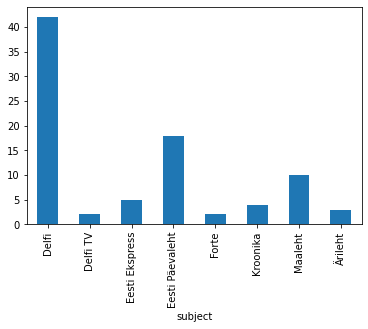

In [290]:
# Artiklite jaotus väljaandjate kaupa
print(data_delfi.groupby(['subject'])['text'].count())
data_delfi.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [291]:
delfi_filter = data_delfi

In [292]:
delfi_filter.shape

(86, 5)

In [293]:
delfi_filter.to_csv('remmelgas/data_delfi_Haabersti_hoberemmelgas.csv',index=False)

In [294]:
read_file = pd.read_csv (r'remmelgas/data_delfi_Haabersti_hoberemmelgas.csv')
read_file.to_excel (r'remmelgas/data_delfi_Haabersti_hoberemmelgas.xlsx', index = None, header=True)

# Sõnapilvede loomine

In [295]:
#https://et.wikipedia.org/wiki/Sides%C3%B5na
#https://www.taskutark.ee/m/asesonad/
#sidesõnad
stopsõnad = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni']
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 'kas',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes', 'mitu-setu', 'mitmes-setmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju']

## Nimi- ja omadussõnade kasutamine

EstNLTK vahenditega vaadeldakse Delfi uudistes esinevate sõnade lemmasid ja sõnade liike. Edaspidiseks vaatluseks eraldatakse nimisõnad (sõnaliik S) ja  omadussõnad (sõnaliigid A - algvõrre, C - keskvõrre, U - ülivõrre).

In [296]:
# Delfi uudistes nimisõnade ja omadussõnade kasutamine

nimi_omadus_sonad = []
for i in tqdm(range (0, len(delfi_filter))):
    rida = delfi_filter.iloc[i]
    tekst = Text(rida[1]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U':
            nimi_omadus_sonad.append(sona[0][0])

nimi_omadus_words = ' '.join(map(str, nimi_omadus_sonad))

100%|██████████████████████████████████████████████████████████████████████████████████| 86/86 [00:14<00:00,  5.79it/s]


Nimisõnu ja omadussõnu sõnapilves:  10350


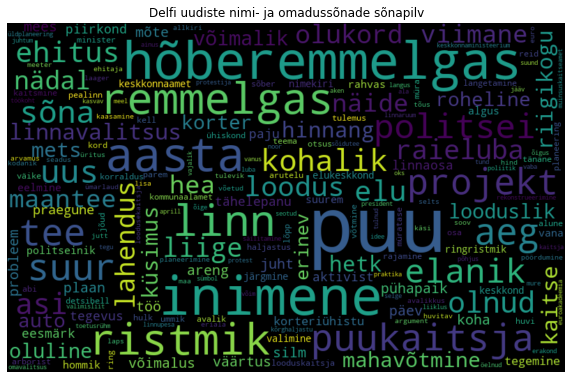

In [399]:
wordcloud_nimi_omadus = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(nimi_omadus_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_nimi_omadus, interpolation='bilinear')
plt.title("Delfi uudiste nimi- ja omadussõnade sõnapilv")
plt.savefig('remmelgas/joonis1_Delfi_Haabersti_hoberemmelgas_nimi_omadus_sõnapilv.png')
plt.axis("off")
print("Nimisõnu ja omadussõnu sõnapilves: ", len(nimi_omadus_sonad))

## Nimi- ja omadussõnade esinemissagedus ning osakaal

In [298]:
df_1 =pd.DataFrame(nimi_omadus_sonad, columns=['sõna'])
sagedused_1 = df_1.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:10]
sagedused_1['osakaal %']= (sagedused_1['esinemissagedus']/len(nimi_omadus_sonad)*100)

In [299]:
print("Delfi ""Haabersti hõberemmelgas"" nimisõnade ja omadussõnade TOP 10")
sagedused_1

Delfi Haabersti hõberemmelgas nimisõnade ja omadussõnade TOP 10


,sõna,esinemissagedus,osakaal %
2039,puu,386,3.729469
619,inimene,144,1.391304
577,hõberemmelgas,137,1.323671
15,aasta,110,1.062802
2217,remmelgas,93,0.898551
1299,linn,92,0.888889
2254,ristmik,91,0.879227
2456,suur,64,0.618357
2050,puukaitsja,63,0.608696
28,aeg,61,0.589372


In [404]:
sagedused_1.to_excel("remmelgas/tabel1_Delfi ""Haabersti hõberemmelgas"" nimisõnade ja omadussõnade TOP 10.xlsx") 

## Verbide kasutamine

100%|██████████████████████████████████████████████████████████████████████████████████| 86/86 [00:15<00:00,  5.55it/s]


Verbe sõnapilves:  5523


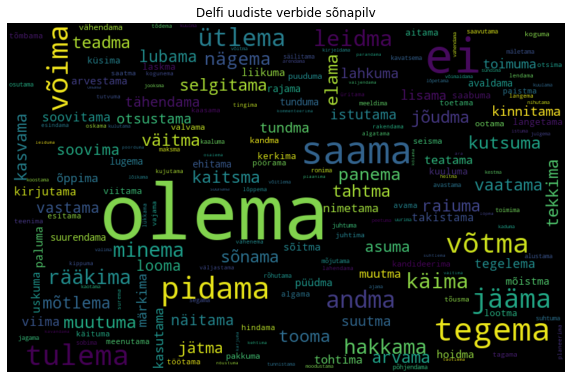

In [400]:
verb_sonad = []
for i in tqdm(range (0, len(delfi_filter))):
    rida = delfi_filter.iloc[i]
    tekst = Text(rida[1]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'V':
            verb_sonad.append(sona[0][0])

verb_words = ' '.join(map(str, verb_sonad))

wordcloud_verb = WordCloud(stopwords = stopsõnad_uus, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(verb_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_verb, interpolation='bilinear')
plt.title("Delfi uudiste verbide sõnapilv")
plt.savefig('remmelgas/joonis2_Delfi_Haabersti_hoberemmelgas_sõnapilv_verb_sonad.png')
plt.axis("off")
print("Verbe sõnapilves: ", len(verb_sonad))

In [301]:
print("Verbe sõnapilves: ", len(verb_sonad))

Verbe sõnapilves:  5523


## Verbide esinemissagedus ja osakaal

In [302]:
df_2 =pd.DataFrame(verb_sonad, columns=['sõna'])
sagedused_2 = df_2.groupby(['sõna']).size().reset_index(name='esinemissagedus').sort_values(by='esinemissagedus', ascending=False)[:10]
sagedused_2['osakaal %']= (sagedused_2['esinemissagedus']/len(verb_sonad)*100)

In [303]:
print("Delfi ""Haabersti hõberemmelgas"" verbide TOP 10")
sagedused_2

Delfi Haabersti hõberemmelgas verbide TOP 10


,sõna,esinemissagedus,osakaal %
364,olema,1260,22.813688
54,ei,301,5.449937
479,saama,179,3.240992
562,tegema,125,2.263263
403,pidama,113,2.045989
666,võima,96,1.738186
583,tulema,94,1.701974
671,võtma,90,1.629549
136,jääma,80,1.448488
691,ütlema,68,1.231215


In [304]:
date = delfi_filter['date'].to_list()

In [316]:
date

['2021-04-13T21:30:06.000Z',
 '2021-04-10T08:33:40.000Z',
 '2020-11-21T06:50:02.000Z',
 '2019-11-24T11:00:42.000Z',
 '2019-07-12T13:25:17.000Z',
 '2018-11-11T14:00:02.000Z',
 '2018-11-07T22:07:14.000Z',
 '2018-09-27T08:47:56.000Z',
 '2018-06-27T18:17:56.000Z',
 '2018-06-26T21:05:33.000Z',
 '2018-05-16T07:55:20.000Z',
 '2018-04-06T19:10:30.000Z',
 '2017-12-28T22:05:02.000Z',
 '2017-12-27T05:30:01.000Z',
 '2017-08-15T06:39:45.000Z',
 '2017-08-01T11:01:40.000Z',
 '2017-07-20T15:20:09.000Z',
 '2017-07-16T06:05:01.000Z',
 '2017-07-14T14:21:11.000Z',
 '2017-07-04T21:10:04.000Z',
 '2017-07-04T21:10:03.000Z',
 '2017-07-04T21:05:02.000Z',
 '2017-07-02T18:44:55.000Z',
 '2017-06-29T10:07:12.000Z',
 '2017-06-29T10:00:58.000Z',
 '2017-06-29T08:39:01.000Z',
 '2017-06-29T08:08:29.000Z',
 '2018-10-16T21:05:02.000Z',
 '2017-06-28T21:10:04.000Z',
 '2017-06-28T11:41:34.000Z',
 '2017-06-28T05:21:04.000Z',
 '2017-06-28T01:36:17.000Z',
 '2018-06-15T13:23:48.000Z',
 '2017-06-27T13:07:16.000Z',
 '2018-01-14T1

In [358]:
kuupäevad = []
aastad = []
kuud = []
päevad = []
aasta_kuud =[]
for otsus in date:
    kuupäev = re.sub('[T][0-9]+[:][0-9]+[:][0-9]+[.][0-9]+[Z]','' ,otsus).strip(' ') #eristatakse kuupäev
    match = re.search(r'\d{4}-\d{2}-\d{2}', kuupäev) #1987-01-30
    aasta = match[0][0:4]
    kuu = match[0][5:7]
    päev = match[0][8:10]
    aasta_kuu = match[0][0:7]
    kuupäevad.append(kuupäev) 
    aastad.append(aasta)
    kuud.append(kuu)
    päevad.append(päev)
    aasta_kuud.append(aasta_kuu)

In [359]:
aasta_kuud

['2021-04',
 '2021-04',
 '2020-11',
 '2019-11',
 '2019-07',
 '2018-11',
 '2018-11',
 '2018-09',
 '2018-06',
 '2018-06',
 '2018-05',
 '2018-04',
 '2017-12',
 '2017-12',
 '2017-08',
 '2017-08',
 '2017-07',
 '2017-07',
 '2017-07',
 '2017-07',
 '2017-07',
 '2017-07',
 '2017-07',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2018-10',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2018-06',
 '2017-06',
 '2018-01',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-07',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-07',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '2017-06',
 '20

In [360]:
delfi_filter['kuupäev']=kuupäevad
delfi_filter['aasta']=aastad
delfi_filter['kuu']=kuud
delfi_filter['päev']=päevad
delfi_filter['aasta_kuu']=aasta_kuud

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [361]:
delfi_filter

title  \
0                                    Politsei, kokad, emad, muusikud ja lillelapsed – pildikesi koroonakevade meeleavalduselt   
1                                                          FOTOD | Protest jätkub: Toompeale toodi meelt avaldama ka maimikud   
2                                     Uus hõberemmelgas? Kohalikud tunnevad muret haruldase Tiskre leinamänni tuleviku pärast   
3   MIS SAAB HOMME? | Mati Puss: mis tähtsust on sellel, et EKRE on valitsuses ja kliima soojeneb, kui oleme vaimselt surnud?   
4                                                      Tallinnas langetatud puu võib tõrjuda Nordeconi idapiiri ehitushankelt   
..                                                                                                                        ...   
89                                                                                    Juhtkiri: nähkem remmelga taga ka metsa   
90                                                                                                     Puu ei ole linnamööbel   
91                              Kristen Michal: keskerakondlik linnavõim oskab planeerida vaid ühest lindilõikamisest teiseni   
92       VIDEO ja FOTOD | Haabersti ringil mitmesaja-aastast puud kaitsvad looduskaitsjad: paju oli siin enne Eesti Vabariiki   
93                      DELFI FOTOD JA VIDEO: Haabersti ristmikul alanud ümberehitus tõi tipptunnil kaasa paraja liikluskaose   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [388]:
print('Artiklite esinemine 2017-2021')
delfi_filter['aasta'].value_counts().sort_index()

Artiklite esinemine 2017-2021


2017    71
2018    10
2019     2
2020     1
2021     2
Name: aasta, dtype: int64

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


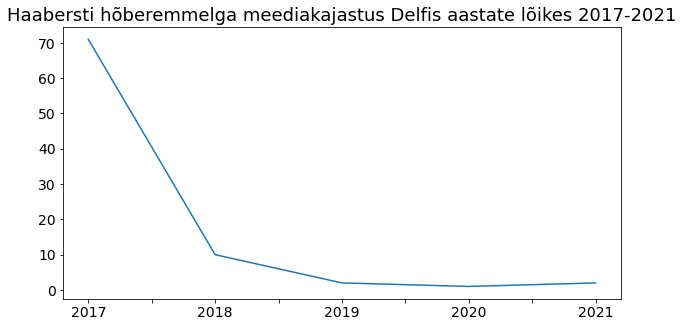

In [408]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Haabersti hõberemmelga meediakajastus Delfis aastate lõikes 2017-2021", size=18)
delfi_filter['aasta'].value_counts().sort_index().plot(ax=ax, kind='line', fontsize=14)
plt.savefig("remmelgas/joonis3_Haabersti_hoberemmelga_meediakajastus_Delfis_aastate_lõikes_2017-2021.png")
plt.show()

In [391]:
delfi_filter['aasta_kuu'].value_counts().sort_index()

2017-05     2
2017-06    56
2017-07     9
2017-08     2
2017-12     2
2018-01     1
2018-04     1
2018-05     1
2018-06     3
2018-09     1
2018-10     1
2018-11     2
2019-07     1
2019-11     1
2020-11     1
2021-04     2
Name: aasta_kuu, dtype: int64

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


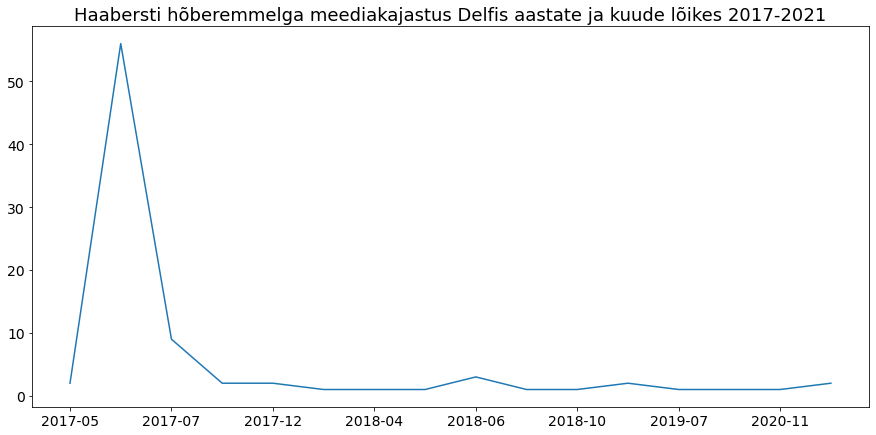

In [412]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Haabersti hõberemmelga meediakajastus Delfis aastate ja kuude lõikes 2017-2021", size=18)
delfi_filter['aasta_kuu'].value_counts().sort_index().plot(ax=ax, kind='line', fontsize=14)
plt.savefig("remmelgas/joonis4_Haabersti_hoberemmelga_meediakajastus_Delfis_aastate_ja_kuude_lõikes_2017-2021.png")
plt.show()

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

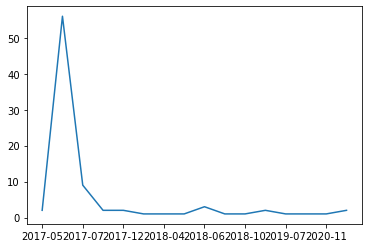

In [392]:
delfi_filter['aasta_kuu'].value_counts().sort_index().plot()

In [385]:
import pandas as pd
my_crosstab = pd.crosstab(index=delfi_filter["aasta"], 
                            columns=delfi_filter["kuu"], margins = True)   # Include row and column totals
my_crosstab

kuu,01,04,05,06,07,08,09,10,11,12,All
aasta,,,,,,,,,,,
2017,0,0,2,56,9,2,0,0,0,2,71
2018,1,1,1,3,0,0,1,1,2,0,10
2019,0,0,0,0,1,0,0,0,1,0,2
2020,0,0,0,0,0,0,0,0,1,0,1
2021,0,2,0,0,0,0,0,0,0,0,2
All,1,3,3,59,10,2,1,1,4,2,86
